#  Importing Text and Flat Files

### Importing entire text files

In [10]:
# Open a file: file
file = open('data/moby_dick.txt', mode='r')

# Print to screen
print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [11]:
# Check if the file is closed
print(file.closed)

# Close file
file.close()

# Check if the file is closed
print(file.closed)

False
True


### Importing text files line by line

In [12]:
# Read and print the first 3 lines
with open('data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### Importing flat files with NumPy
##### Best for numerical files, not mixed data types

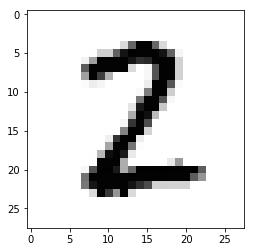

In [17]:
# Import NumPy & matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = "data/digits.csv"

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Select and reshape a row
im = digits[22, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

### Customizing NumPy import

In [25]:
# load digits_header.txt with tab delimiter, skip row 1, and only use 1st and 3rd column
data = np.loadtxt('data/digits_header.txt', delimiter='\t', skiprows=1, usecols=[0, 2], )
data_t = np.transpose(data) # Transpose so print takes less space, just for compactness
data_t

array([[1., 0., 1., 4., 0., 0., 7., 3., 5., 3., 8., 9., 1., 3., 3., 1.,
        2., 0., 7., 5., 8., 6., 2., 0., 2., 3., 6., 9., 9., 7., 8., 9.,
        4., 9., 2., 1., 3., 1., 1., 4., 9., 1., 4., 4., 2., 6., 3., 7.,
        7., 4., 7., 5., 1., 9., 0., 2., 2., 3., 9., 1., 1., 1., 5., 0.,
        6., 3., 4., 8., 1., 0., 3., 9., 6., 2., 6., 4., 7., 1., 4., 1.,
        5., 4., 8., 9., 2., 9., 9., 8., 9., 6., 3., 6., 4., 6., 2., 9.,
        1., 2., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

### Importing mixed data types in NumPy
###### First two ways to handle this: 1) import data as string 2) skip the string row(s). See example below

['Time' 'Percent']
['99' '0.067']
['Time' 'Percent']
['99' '0.067']


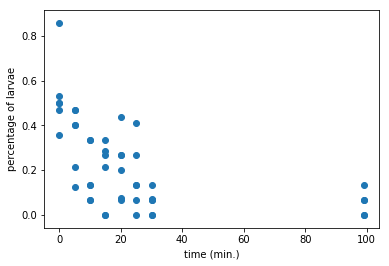

In [38]:
# Import file: seaslug.txt
data = np.loadtxt('data/seaslug.txt', delimiter='\t', dtype=str)

# Print the first two elements of the data
print(data[0])
print(data[1])

# Import file: seaslug.txt
# If row not skipped, the dtype=float errors on the first line of text
data_float = np.loadtxt('data/seaslug.txt', delimiter='\t', dtype=float, skiprows=1)

# Print the first two elements of the data
print(data[0])
print(data[1])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

### Another way to handle this...

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:

data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
Here, the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

In [39]:
# Import data with header ('names') and no data-type
data = np.genfromtxt('data/titanic_sub.csv', delimiter=',', names=True, dtype=None, encoding=None)
print(np.shape(data))
data['Survived']

(891,)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### One more way...
There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None.

In [52]:
# Import file using np.recfromcsv: d
d = np.recfromcsv('data/titanic_sub.csv', encoding=None)

# Print the first three rows
print(d[:3])

# Print array info
print('\n')
np.info(d)

[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')]


class:  recarray
shape:  (891,)
strides:  (216,)
itemsize:  216
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x110759000
byteorder:  little
byteswap:  False
type: (numpy.record, [('passengerid', '<i8'), ('survived', '<i8'), ('pclass', '<i8'), ('sex', '<U6'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('ticket', '<U18'), ('fare', '<f8'), ('cabin', '<U15'), ('embarked', '<U1')])


### Using pandas to import flat files as DataFrames

In [54]:
# Import pandas
import pandas as pd

# Read the first five rows of the file into a DF: data
data = pd.read_csv('data/digits.csv', nrows=5, header=None)

# Build a numpy array from the DF: data_array
data_array = np.array(data)

print('pandas DF: \n', data, '\n')
print('numpy array: \n', data_array)

pandas DF: 
    0    1    2    3    4    5    6    7    8    9   ...   775  776  777  778  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns] 

numpy array: 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Customizing pandas import - dealing w/comments & empty values

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
0         A/5 21171   7.250   NaN       S   
1          PC 17599     NaN   NaN      NaN  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S  


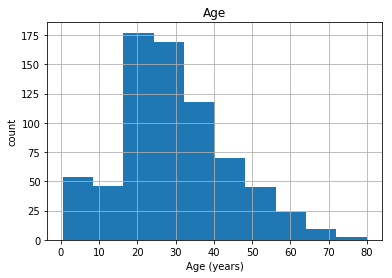

In [55]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'data/titanic_corrupt.csv'

# Import file: data
# Note: na_values takes a list of strings to recognize as NA/NaN, in this case it replaces 'Nothing' with NaN
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

In [113]:
import numpy as np
pick = np.logical_or(sales['product'] == 'A', sales['product'] == 'B')
sales[pick]

[8, 10, 'B', 'Thu', -7]


# Importing data from other file types
### Pickle & Excel

###### Explore in Python

In [128]:
import os
wd = os.getcwd()
print('Current directory:\n\n', wd)
print('\nFiles and directories in current directory:')
os.listdir(wd)

Current directory:

 /Users/djryanthomas/Desktop/Data Science

Files and directories in current directory:


['Python Data Science Toolbox Part 1.ipynb',
 'Importing Data in Python Part 1.ipynb',
 'Python Basics.ipynb',
 '.DS_Store',
 'Untitled.ipynb',
 'Python Data Science Toolbox Part 2.ipynb',
 'Supervised Learning with Scikit-Learn.ipynb',
 '.ipynb_checkpoints',
 'data']

### Pickle

In [ ]:
# Note: there is no local file called data.pkl, so this cannot be executed - only for example

# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

### Listing sheets in an Excel file - using pandas

In [60]:
# Import pandas
import pandas

# Assign spreadsheet filename: file
file = 'data/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['2002', '2004']


### ...then import the sheets

In [61]:
# Load and print the head of a sheet into a DF by name: df1
df1 = xl.parse('2004')
print(df1.head())

# Load and print the head of a sheet into a DF by index: df2
df2 = xl.parse(0)
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### ...then customize the import

In [62]:
# Parse the first sheet, skipping row 1, and rename the columns, then print the head: df1
df1 = xl.parse(0, skiprows=[0], names=['Country','AAM due to War (2002)'])
print(df1.head())

# Parse the first column of the second sheet, skipping row 1, and rename the column, then print the head: df2
df2 = xl.parse(1, usecols=[0], skiprows=[0], names=['Country'])
print(df2.head())

# Note: ExcelFile.parse(sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False,\
# converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None,\
# parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, **kwds)

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


# Working with relational databases in Python

### Getting table names

In [166]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/Chinook.sqlite')

table_names = engine.table_names()

print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### Querying relational databases

###### Steps: 
###### 1) Import packages and functions 
###### 2) Create the database engine
###### 3) Connect to the engine
###### 4) Query the database
###### 5)  Save the query results to a DataFrame
###### 6) Name the columns
###### 7) Close the connection - unless using a context manager

In [173]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save the results of the query to DF: df
df = pd.DataFrame(rs.fetchall())

# Name the columns
df.columns = rs.keys()

# Close the connection
con.close()

# Print the header
print(df.head())


   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


### Another example, but using the context manager

In [177]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Open engine in context manager, then perform query and save results to a DF: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the head of the DF df
print(df.head())

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


### The pandas way to query - IN 1 LINE vs 4 LINES
###### Note: '\\' was used to make SQL statement more readable over multiple lines

In [179]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Execute query and store records in DF: df
df = pd.read_sql_query(
    "SELECT * FROM Employee \
     WHERE EmployeeId >= 6  \
     ORDER BY BirthDate     \
", engine)

# Print head of DF
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


### INNER-JOIN
Assign to rs the results from the following query: select all the records, extracting the Title of the record and Name of the artist of each record from the Album table and the Artist table, respectively. To do so, INNER JOIN these two tables on the ArtistID column of both.

In [188]:
# Open engine in context manager, then perform query and save results to a DF: df
with engine.connect() as con:
    rs = con.execute("SELECT title, Name \
                      FROM Album         \
                      INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the head of the DF df
print(df.head())

                                   Title    Name
0  For Those About To Rock We Salute You   AC/DC
1                      Balls to the Wall  Accept
2                      Restless and Wild  Accept


### INNER-JOIN - pandas method with a WHERE

In [189]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack \
                        INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId \
                        WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  


In [1]:
!jt -r

Reset css and font defaults in:
/Users/djryanthomas/.jupyter/custom &
/Users/djryanthomas/Library/Jupyter/nbextensions
